# mnist 6

Build a model to read digits.

In [1]:

from fastai.data.block import DataBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, GrandparentSplitter
from fastai.metrics import error_rate
from fastai.vision.data import ImageBlock

path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/home/manu/.fastai/data/mnist_png/training'),Path('/home/manu/.fastai/data/mnist_png/testing')]

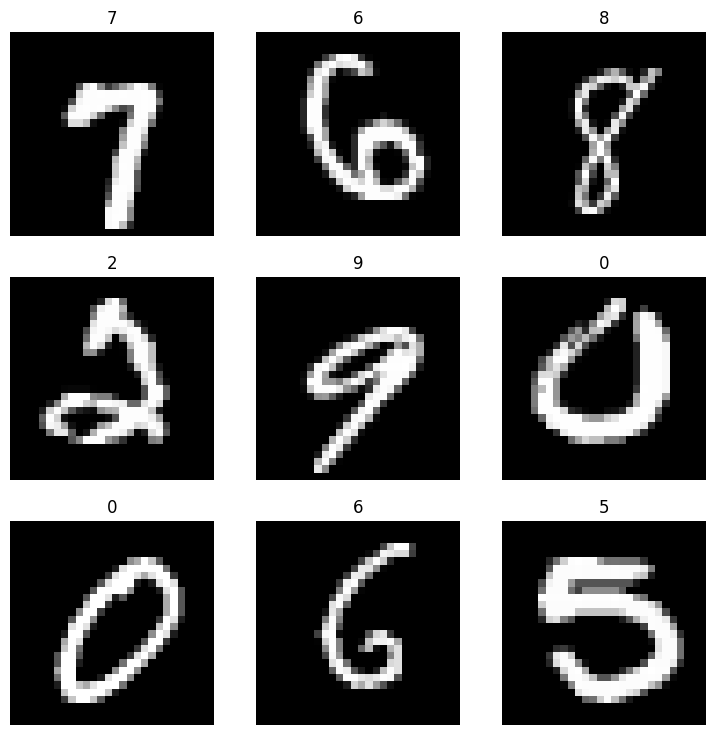

In [2]:

datablock: DataBlock = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='training', valid_name='testing')
)
dls = datablock.dataloaders(path, bs=256)
dls.show_batch()

In [9]:
from torchvision.models import resnet34
from fastai.vision.learner import vision_learner

from fastai.callback.schedule import minimum, steep, valley

learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()
suggest_lr = learn.lr_find(suggest_funcs=(minimum, steep, valley))
suggest_lr

/home/manu/prog/content/safetensors-vs-cpkt/venv/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/home/manu/prog/content/safetensors-vs-cpkt/venv/lib/python3.10/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f4bc6e081c0>>
Traceback (most recent call last):
  File "/home/manu/prog/content/safetensors-vs-cpkt/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f4bc6e081c0>>
Traceback (most recent call last):
  File "/home/manu/prog/content/safetensors-vs-cpkt/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
KeyboardInterrupt: 


KeyboardInterrupt: 

In [4]:

learn.fine_tune(7, base_lr=abs(suggest_lr.steep - suggest_lr.valley)/2)

epoch,train_loss,valid_loss,error_rate,time
0,0.627497,0.332881,0.104300,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.087894,0.067604,0.021300,00:34
1,0.059028,0.050919,0.016300,00:29
2,0.038305,0.039938,0.010600,00:27
3,0.029441,0.034518,0.009400,00:28
4,0.013995,0.026372,0.007100,00:37
5,0.005372,0.024915,0.006200,00:38
6,0.003027,0.024741,0.006600,00:34


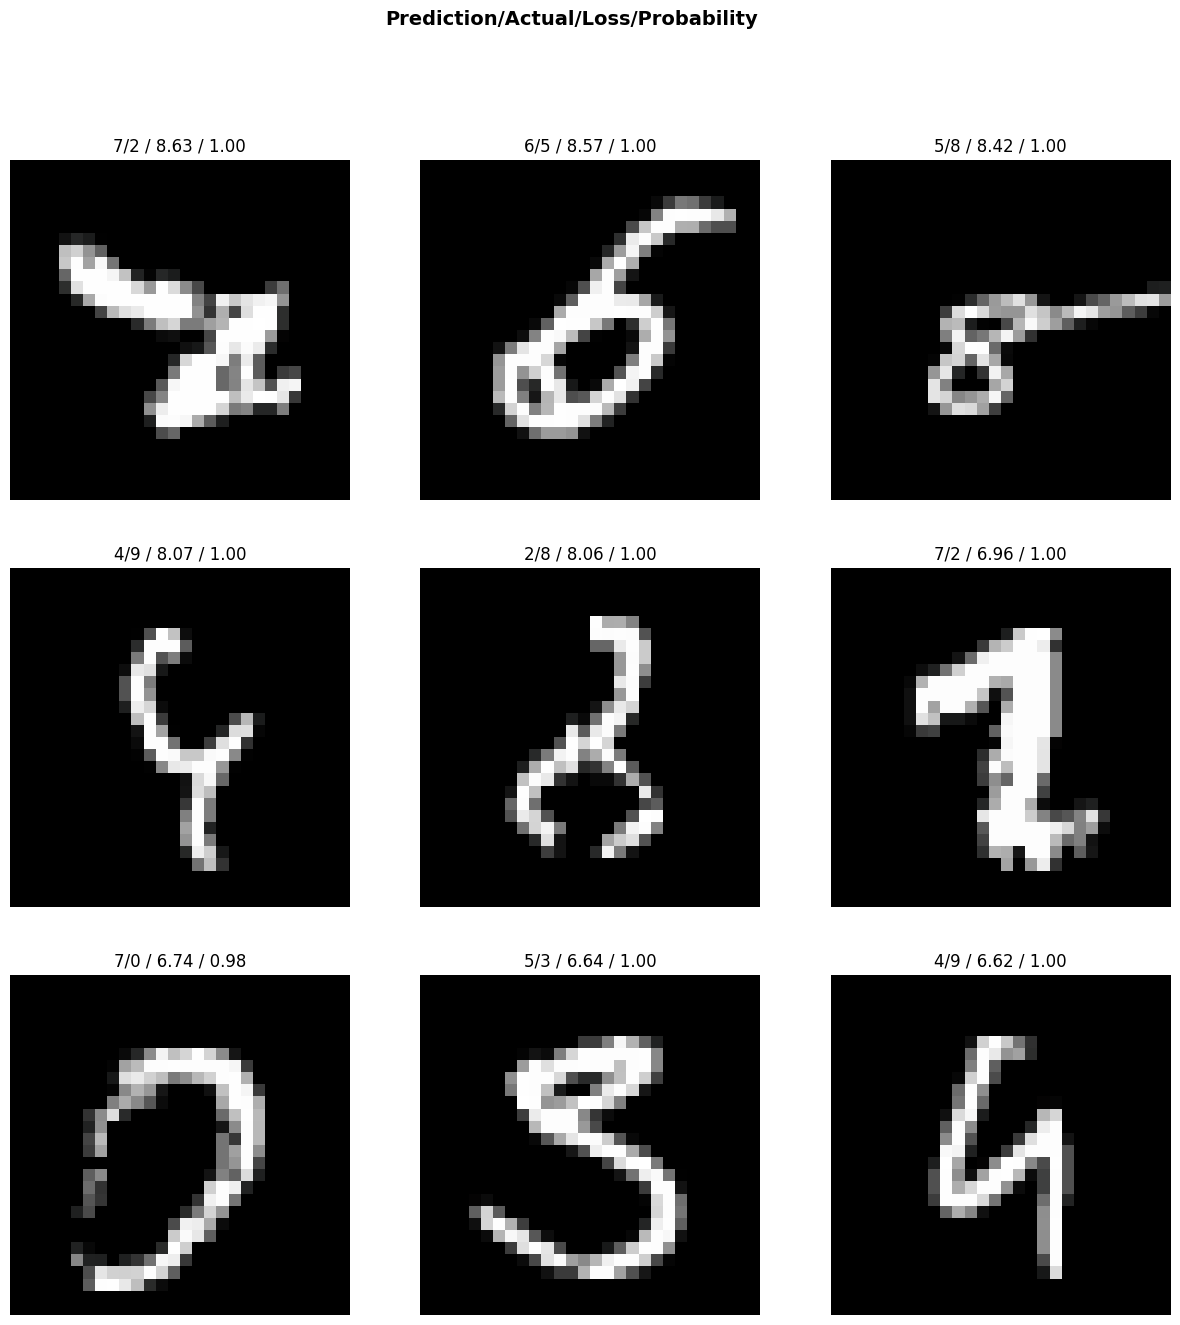

In [5]:
from fastai.interpret import Interpretation

interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

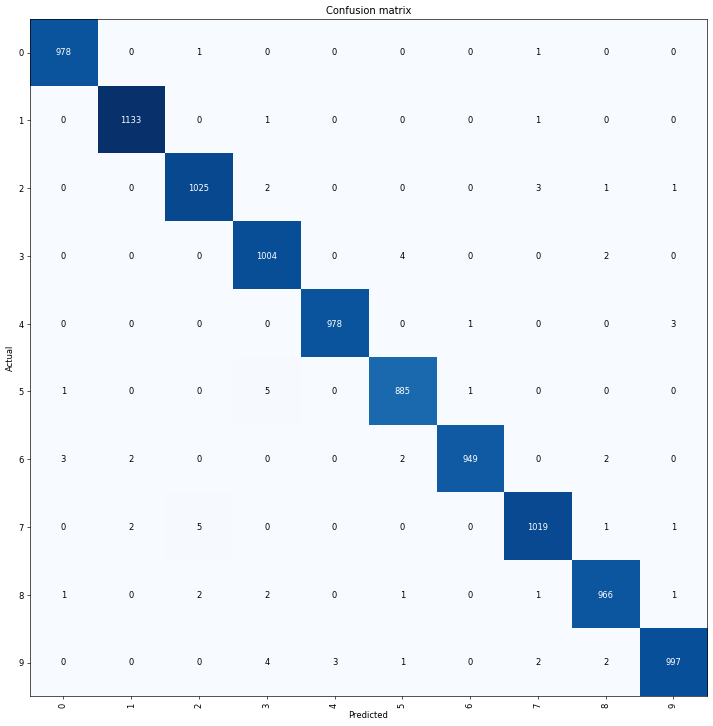

In [6]:
from fastai.interpret import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [7]:
import torch

learn.export()
torch.save(learn.state_dict(), 'state0.pth')

In [8]:
from safetensors.torch import save_model

save_model(learn.model, 'digits.safetensors')